In [1]:
print("Support Vector Machine ")

Support Vector Machine 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons, make_circles, load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV#for cross validation

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4)


In [3]:
# Generate a simple linearly separable dataset
X_lin, y_lin = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.8,
    random_state=42,
)

y_lin[:10]  # quick look at labels

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

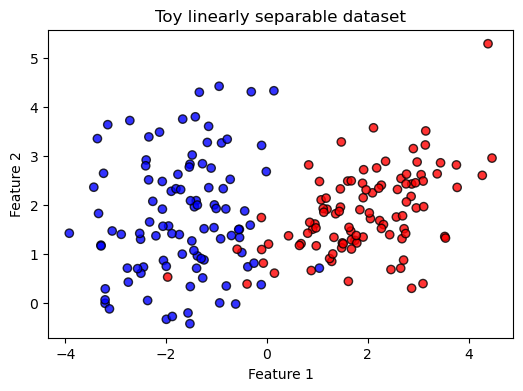

In [4]:
# Visualise the toy dataset
plt.scatter(X_lin[:, 0], X_lin[:, 1], c=y_lin, cmap='bwr', edgecolors='k', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy linearly separable dataset')
plt.show()

In [5]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#train a linear SVM classifier
svm_linear=SVC(kernel="linear",C=1.0,random_state=42)
svm_linear.fit(X_train_scaled,y_train)
y_pred=svm_linear.predict(X_test_scaled)
acc=accuracy_score(y_test,y_pred)
print("Accuracy score is :",acc)

Accuracy score is : 0.975


In [7]:
# Helper function to plot decision boundary for 2D data
def plot_decision_boundary(model, X, y, title='Decision boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

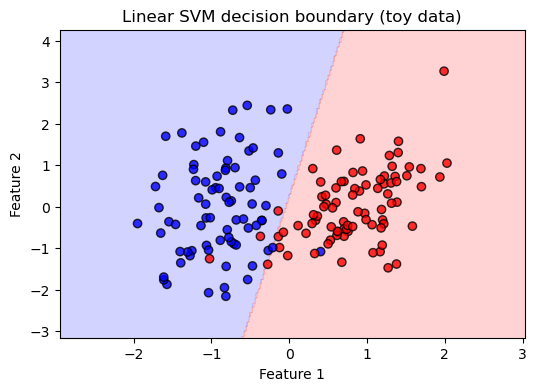

In [8]:
# Visualise the linear SVM boundary on scaled training data
plot_decision_boundary(svm_linear, X_train_scaled, y_train, title='Linear SVM decision boundary (toy data)')

15.3 Kernels: Linear, Polynomial, and RBF

In this section we use non linear datasets (moons and circles) to see why 

kernels are needed and how different kernels behave.

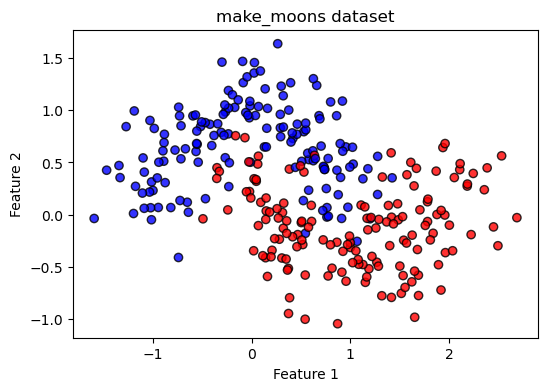

In [9]:
# Generate moons dataset (non linear but simple)
X_moon, y_moon = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='bwr', edgecolors='k', alpha=0.8)
plt.title('make_moons dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# Scale moons data
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moon, y_moon, test_size=0.2, random_state=42
)

scaler_moon = StandardScaler()
X_moon_train_scaled = scaler_moon.fit_transform(X_moon_train)
X_moon_test_scaled = scaler_moon.transform(X_moon_test)

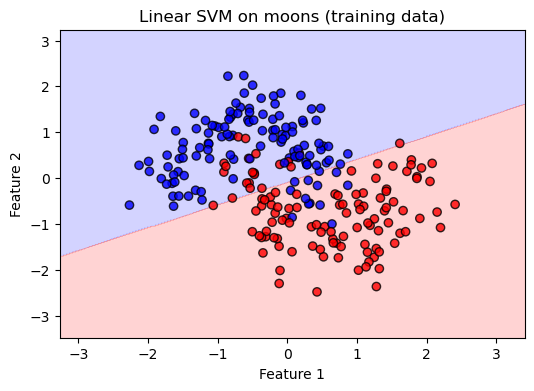

Accuracy (linear kernel on moons): 0.8833333333333333


In [11]:
# Linear kernel on moons
svc_linear_moon = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_linear_moon, X_moon_train_scaled, y_moon_train,
                       title='Linear SVM on moons (training data)')
print('Accuracy (linear kernel on moons):', accuracy_score(y_moon_test,
      svc_linear_moon.predict(X_moon_test_scaled)))

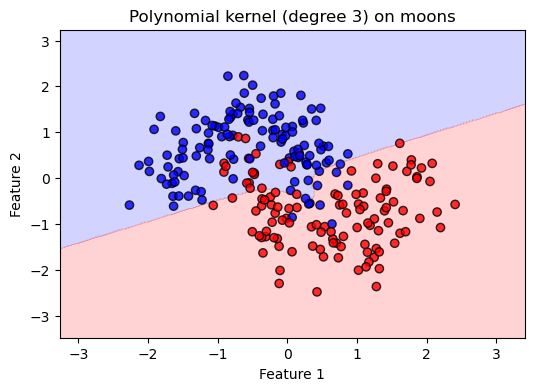

Accuracy (polynomial kernel on moons): 0.9


In [12]:
# Polynomial kernel on moons
svc_poly_moon = SVC(kernel='poly', degree=3, C=20.0, gamma='scale', random_state=42)
svc_poly_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_poly_moon, X_moon_train_scaled, y_moon_train,
                       title='Polynomial kernel (degree 3) on moons')
print('Accuracy (polynomial kernel on moons):', accuracy_score(y_moon_test,
      svc_poly_moon.predict(X_moon_test_scaled)))

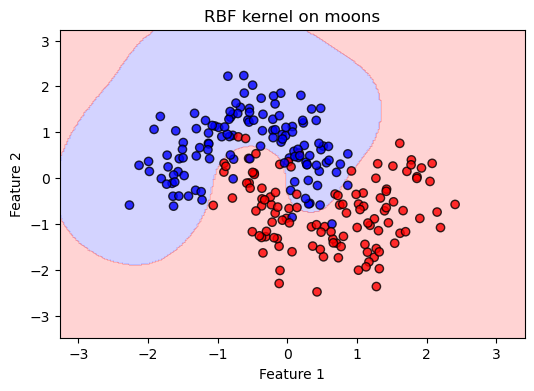

Accuracy (RBF kernel on moons): 0.9166666666666666


In [13]:
# RBF kernel on moons
svc_rbf_moon = SVC(kernel='rbf', C=10.0, gamma=1.0, random_state=42)
svc_rbf_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_rbf_moon, X_moon_train_scaled, y_moon_train,
                       title='RBF kernel on moons')
print('Accuracy (RBF kernel on moons):', accuracy_score(y_moon_test,
      svc_rbf_moon.predict(X_moon_test_scaled)))

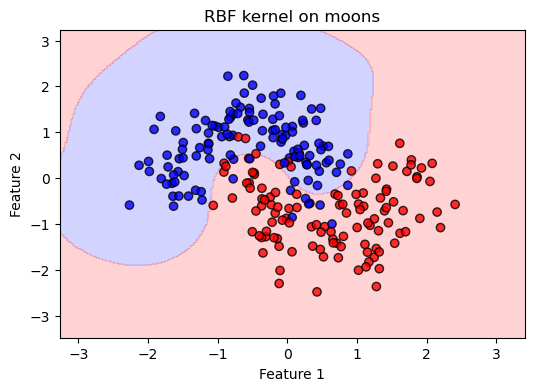

Accuracy (RBF kernel on moons): 0.9


In [14]:
# RBF kernel on moons
svc_rbf_moon = SVC(kernel='rbf', C=1.0, gamma=1.0, random_state=42)
svc_rbf_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_rbf_moon, X_moon_train_scaled, y_moon_train,
                       title='RBF kernel on moons')
print('Accuracy (RBF kernel on moons):', accuracy_score(y_moon_test,
      svc_rbf_moon.predict(X_moon_test_scaled)))

15.4 SVM Classification on Real Data (Breast Cancer Dataset)

Now we move to a real world dataset: the breast cancer dataset from scikit 

learn. We will train an SVM classifier and inspect its performance.

In [15]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_bc = cancer.data
y_bc = cancer.target

print('Feature shape:', X_bc.shape)
print('Classes:', cancer.target_names)

Feature shape: (569, 30)
Classes: ['malignant' 'benign']


In [16]:
# Train test split and scaling
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42, stratify=y_bc
)

scaler_bc = StandardScaler()
X_bc_train_scaled = scaler_bc.fit_transform(X_bc_train)
X_bc_test_scaled = scaler_bc.transform(X_bc_test)

In [17]:
# Train an RBF SVM classifier on breast cancer data
svc_bc = SVC(kernel='rbf', C=1.0, gamma = 'scale', random_state=42)
svc_bc.fit(X_bc_train_scaled, y_bc_train)

y_bc_pred = svc_bc.predict(X_bc_test_scaled)
acc_bc = accuracy_score(y_bc_test, y_bc_pred)
print("Accuracy with RBF: ", acc_bc)

print('\nClassification report:')
print(classification_report(y_bc_test, y_bc_pred, target_names=cancer.target_names))

Accuracy with RBF:  0.9824561403508771

Classification report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [18]:
# Confusion matrix
cm = confusion_matrix(y_bc_test, y_bc_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[41  1]
 [ 1 71]]


 Effect of Hyperparameters C and gamma

In SVM with RBF kernel, the parameter C controls the softness of the margin and 

gamma controls how far a point influences the decision boundary.

In [19]:
def evaluate_svm_c_gamma(X_train, X_test, y_train, y_test, C_values, gamma_values):
    results = []
    for C in C_values:
        for gamma in gamma_values:
            model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({'C': C, 'gamma': gamma, 'accuracy': acc})
    return pd.DataFrame(results)

C_values = [0.1, 1.0, 10.0]
gamma_values = ['scale', 0.01, 0.1, 1.0]

df_hyper = evaluate_svm_c_gamma(X_bc_train_scaled, X_bc_test_scaled,
                                y_bc_train, y_bc_test,
                                C_values, gamma_values)
df_hyper

,C,gamma,accuracy
0,0.1,scale,0.947368
1,0.1,0.01,0.956140
2,0.1,0.1,0.947368
3,0.1,1.0,0.631579
4,1.0,scale,0.982456
5,1.0,0.01,0.982456
6,1.0,0.1,0.956140
7,1.0,1.0,0.631579
8,10.0,scale,0.973684
9,10.0,0.01,0.982456


In [20]:
# Sort by accuracy to see top combinations
df_hyper.sort_values('accuracy', ascending=False)

,C,gamma,accuracy
5,1.0,0.01,0.982456
9,10.0,0.01,0.982456
4,1.0,scale,0.982456
8,10.0,scale,0.973684
6,1.0,0.1,0.956140
1,0.1,0.01,0.956140
0,0.1,scale,0.947368
2,0.1,0.1,0.947368
10,10.0,0.1,0.947368
3,0.1,1.0,0.631579


## 15.6 Introduction to Support Vector Regression (SVR)


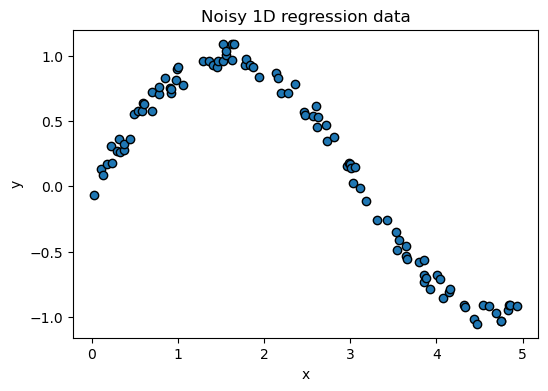

In [21]:
# Create a simple 1D regression dataset
rng = np.random.RandomState(42)
X_reg = np.sort(5 * rng.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel()

# Add some noise
y_reg += 0.2 * (rng.rand(y_reg.shape[0]) - 0.5)

plt.scatter(X_reg, y_reg, edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy 1D regression data')
plt.show()

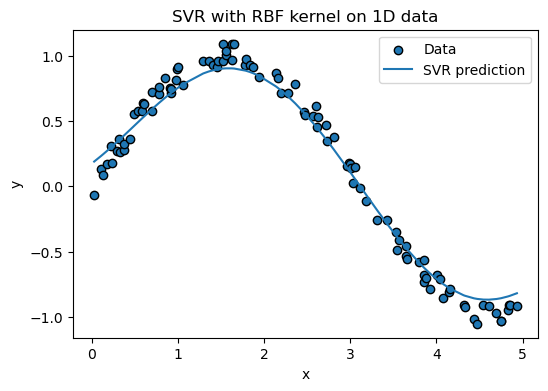

In [22]:
# Train an SVR with RBF kernel
svr_rbf = SVR(kernel='rbf', C=0.1, epsilon= 0.1, gamma = 'scale')
svr_rbf.fit(X_reg, y_reg)

y_reg_pred = svr_rbf.predict(X_reg)

plt.scatter(X_reg, y_reg, edgecolors='k', label='Data')
plt.plot(X_reg, y_reg_pred, label='SVR prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVR with RBF kernel on 1D data')
plt.legend()
plt.show()

In [23]:
# Evaluate SVR with MSE and R^2
mse = mean_squared_error(y_reg, y_reg_pred)
r2 = r2_score(y_reg, y_reg_pred)

print("MSE: ", mse)
print("R^2: ",r2)

MSE:  0.008659453875945123
R^2:  0.9818609249737438


*** SVR on Real Data (Diabetes Dataset)**

We now apply SVR on a real dataset from scikit learn. This shows how it behaves on tabular regression data.

In [24]:
# Load diabetes dataset
diabetes = load_diabetes()
X_diab = diabetes.data
y_diab = diabetes.target

print('Feature shape:', X_diab.shape)

Feature shape: (442, 10)


In [25]:
# Train test split and scaling
X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(
    X_diab, y_diab, test_size=0.2, random_state=42
)

scaler_diab = StandardScaler()
X_diab_train_scaled = scaler_diab.fit_transform(X_diab_train)
X_diab_test_scaled = scaler_diab.transform(X_diab_test)

In [26]:
# Train SVR on diabetes data
svr_diab = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma='scale')
svr_diab.fit(X_diab_train_scaled, y_diab_train)

y_diab_pred = svr_diab.predict(X_diab_test_scaled)

mse_diab = mean_squared_error(y_diab_test, y_diab_pred)
r2_diab = r2_score(y_diab_test, y_diab_pred)

print("MSE: ", mse_diab)
print("R^2: ", r2_diab)

MSE:  2682.387949725229
R^2:  0.4937125101265256
